<h2 align=center><font size=6>Capstone Project - The Battle of the Neighborhoods (Week 2)</font></h2>
<h2 align=center><font size=5>Applied Data Science Capstone by IBM/Coursera</font></h2>
<h2 align=center><font size = 4>Choosing the best neighborhood to locate a Zimbabwean cuisine restaurant in New York City</font></h2>

**Table of contents**
1. *Introduction: Business Problem*
2. *Data*
3. *Methodology*
4. *Analysis*
5. *Results and Discussion*
6. *Conclusion*

<h2 align=center><font size=5>1. Introduction and problem definition.</font></h2>

During a recent trip to New York, a Zimbabwean delegation noticed a number of African cuisine restaurants but none serving Zimbabwean dishes. One of the business delegation members seeks to open a restaurant specifically to serve Zimbabwean cuisine in order to ride on the growth in demand of African cuisines in a cosmopolitan city like New York. 

No matter where in the world one considers building a startup, they are bound to be both nervous and anxious. For an entrepreneur, it can be nerve-wracking attempting to maneuver through a big city looking for a suitable location to establish company operations. Location is one of the pivotal points of consideration and can affect almost every aspect of the company. Taking the time to investigate multiple locations wastes both time and money. It is judicious to ask for the services of a data scientist so that they recommend the most suitable location based on agreed criteria. 

For this project, I seek to answer the question; 'Where would we recommend that an Zimbabwean cuisine restaurant be located in the city of New York?' 

Where to locate the restaurant business depends in part on the location of the target market (expatriate areas with a limited number of African restaurants), business partners (other African cuisine restaurants to assist with visibility), and personal preferences (easy access from subway and airports). 

We aim to come up with clusters of recommended neighborhoods and offer our client options to consider as they select the most suitable location. Our results here can be of interest to anyone looking to establish a restaurant business in a big city like New York.

<h2 align=center><font size=5>2. Data</font></h2>

The data we need to narrow down the site choices of the restaurant as contemplated in this project is as follows:
expatriate areas with a maximum of five African restaurants, near a major business district, and a transport hub.

We will show skills of moving data around, using databases, using APIs, performing data transformation, 
and creating visualizations using Python. 

Data will be gathered from  https://geo.nyu.edu/catalog/nyu_2451_34572 and https://www.restohub.org/

I shall use the Foursquare API to explore neighborhoods in New York City and apply the explore function to get the most common venue categories in each of the neighborhoods. I will then use this feature to group the neighborhoods into clusters and use the k-means clustering algorithm to refine the groupings. Finally, I will use the Folium library to visualize the neighborhoods in New York City and their emerging clusters as well as push the right neighborhood for setting up the restaurant business. 



<h2 align=center>3. Methodology</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

To get us started let's download dependencies that we  may need for the project.

In [1]:
print('Downloading dependencies', end='')
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Done')



==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##############

#### 1. Download and Explore Dataset

Neighborhood has a total of **5 boroughs and 306 neighborhoods**. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the latitude and longitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web through the link:https://geo.nyu.edu/catalog/nyu_2451_34572

For our convenience, the downloaded files are available on the IBM server, so we can simply run a `wget` command and access the data.


In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load and explore the data from downloaded file

In [3]:
with open('newyork_data.json') as json_data:
    newyorkcity_data = json.load(json_data)
newyorkcity_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

##### All the relevant data is in the *features* key, which is basically a list of the neighborhoods. To proceed we are better off defining a new variable that includes this data.

In [4]:
nyneighborhoods_data = newyorkcity_data['features']
nyneighborhoods_data[0] #show the first item in the list

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Transform the data into a pandas dataframe for easy manipulation
We start by creating an empty dataframe that we populate through a loop

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
nyneighborhoods = pd.DataFrame(columns=column_names)
nyneighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [6]:
for data in nyneighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyneighborhoods = nyneighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
nyneighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

Let us verify that our dataframe has all the data for New York City; 5 boroughs and 306 neighbourhoods.

In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyneighborhoods['Borough'].unique()),
        nyneighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [8]:
nyneighborhoods.shape

(306, 4)

#### Use geopy library to get the latitude and longitude values of New York City.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent *nyc_explorer*, as shown below.

In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York City with neighborhoods superimposed on top.

In [10]:
# create map of New York using latitude and longitude values
map_newyorkcity = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyneighborhoods['Latitude'], nyneighborhoods['Longitude'], nyneighborhoods['Borough'], nyneighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyorkcity)  
    
map_newyorkcity

We are going to utilize the Foursquare API to explore the neighborhoods and segment them.

Firstly we define **Foursquare Credentials and Version**

In [11]:
CLIENT_ID = 'B35L000DVQBFKI4IS5AC22RPYJNANWVJ0RR0WW41OSYOCTIW' # your Foursquare ID
CLIENT_SECRET = 'U5ADQHCWGEE1NY2BOHQ5PWZJPUX5IPLIYCXKBVNQJHBWHJCN' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B35L000DVQBFKI4IS5AC22RPYJNANWVJ0RR0WW41OSYOCTIW
CLIENT_SECRET:U5ADQHCWGEE1NY2BOHQ5PWZJPUX5IPLIYCXKBVNQJHBWHJCN


Let's explore the first neighborhood in our dataframe.  
**Get the neighborhood's name.**

In [12]:
nyneighborhoods.loc[0, 'Neighborhood']

'Wakefield'

**Get the neighborhood's latitude and longitude values.**

In [13]:
neighborhood_latitude = nyneighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = nyneighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = nyneighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the top 100 venues that are in Wakefield within a radius of 1000 meters.  
First, let's create the **GET request URL** and name the URL *url*.

In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=B35L000DVQBFKI4IS5AC22RPYJNANWVJ0RR0WW41OSYOCTIW&client_secret=U5ADQHCWGEE1NY2BOHQ5PWZJPUX5IPLIYCXKBVNQJHBWHJCN&v=20180604&ll=40.89470517661,-73.84720052054902&radius=1000&limit=100'

#### Send the GET request and examine the results

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d4720e57ca06c0023350d99'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': 40.903705185610015,
    'lng': -73.83531662200086},
   'sw': {'lat': 40.88570516760999, 'lng': -73.85908441909719}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'ln

Let us borrow the **get_category_type function** from the Foursquare lab, clean the json file and create a pandas dataframe

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#------------------------------------------

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name            categories        lat        lng
0             Lollipops Gelato          Dessert Shop  40.894123 -73.845892
1           Ripe Kitchen & Bar  Caribbean Restaurant  40.898152 -73.838875
2              Ali's Roti Shop  Caribbean Restaurant  40.894036 -73.856935
3                     Rite Aid              Pharmacy  40.896649 -73.844846
4  Jackie's West Indian Bakery  Caribbean Restaurant  40.889283 -73.843310

Let us see how many venues Foursquare returned

In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


#### 2. Explore Neighborhoods in New York City
Let's create a function to repeat the same process to all the neighborhoods in New York City.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

**Now we write a code to run the above function on each neighborhood and create a new dataframe called nyneighborhoods_venues.**

In [19]:
# Creating a new dataframe with new york city venues
nyneighborhoods_venues = getNearbyVenues(names=nyneighborhoods['Neighborhood'],
                                   latitudes=nyneighborhoods['Latitude'],
                                   longitudes=nyneighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

#### Checking the size of the resulting dataframe

In [20]:
print(nyneighborhoods_venues.shape)
nyneighborhoods_venues.head()

(10404, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                                     Venue  Venue Latitude  Venue Longitude  \
0                         Lollipops Gelato       40.894123       -73.845892   
1                                 Rite Aid       40.896649       -73.844846   
2                         Carvel Ice Cream       40.890487       -73.848568   
3  Cooler Runnings Jamaican Restaurant Inc       40.898276       -73.850381   
4                                  Dunkin'       40.890459       -73.849089   

         Venue_Category  
0          Dessert Shop  
1              Pharmacy  
2        Ice Cream Shop  
3  Caribbean Restaurant  
4            Donut Shop

#### Number of venues returned for each neighborhood

In [21]:
nyneighborhoods_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      31                      31   
Annadale                                      13                      13   
Arden Heights                                  4                       4   
Arlington                                      4                       4   
Arrochar                                      21                      21   
Arverne                                       18                      18   
Astoria                                      100                     100   
Astoria Heights                               12                      12   
Auburndale                                    16                      16   
Bath Beach                                    51                      51   
Battery Park City                            100                     100   
Bay Ridge                                     86                      86   
Bay Terrace                                   51                      51   
Baychester                                    20                      20   
Bayside                                       73                      73   
Bayswater                                      2                       2   
Bedford Park                                  34                      34   
Bedford Stuyvesant                            25                      25   
Beechhurst                                    15                      15   
Bellaire                                       8                       8   
Belle Harbor                                  19                      19   
Bellerose                                     21                      21   
Belmont                                      100                     100   
Bensonhurst                                   27                      27   
Bergen Beach                                   6                       6   
Blissville                                    19                      19   
Bloomfield                                     5                       5   
Boerum Hill                                   89                      89   
Borough Park                                  24                      24   
Breezy Point                                   4                       4   
Briarwood                                     11                      11   
Brighton Beach                                43                      43   
Broad Channel                                  6                       6   
Broadway Junction                             17                      17   
Bronxdale                                     17                      17   
Brooklyn Heights                             100                     100   
Brookville                                     3                       3   
Brownsville                                   19                      19   
Bulls Head                                    43                      43   
Bushwick                                      76                      76   
Butler Manor                                   7                       7   
Cambria Heights                               14                      14   
Canarsie                                       8                       8   
Carnegie Hill                                100                     100   
Carroll Gardens                              100                     100   
Castle Hill                                   10                      10   
Castleton Corners                             14                      14   
Central Harlem                                42                      42   
Charleston                                    33                      33   
Chelsea                                      105                     105   
Chinatown                                    100                     100   

#### Unique categories to be curated from all returned venues

In [23]:
print('There are {} uniques categories.'.format(len(nyneighborhoods_venues['Venue_Category'].unique())))

There are 430 uniques categories.


#### 3. Analyze each neighborhood

In [25]:
# one hot encoding
nyneighborhoods_onehot = pd.get_dummies(nyneighborhoods_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyneighborhoods_onehot['Neighborhood'] = nyneighborhoods_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyneighborhoods_onehot.columns[-1]] + list(nyneighborhoods_onehot.columns[:-1])
nyneighborhoods_onehot = nyneighborhoods_onehot[fixed_columns]

nyneighborhoods_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  Airport Terminal  American Restaurant  Antique Shop  \
0                   0                 0                    0             0   
1                   0                 0                    0             0   
2                   0                 0                    0             0   
3                   0                 0                    0             0   
4                   0                 0                    0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              

In [26]:
# View size of new dataframe
nyneighborhoods_onehot.shape

(10404, 430)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
nyneighborhoods_grouped = nyneighborhoods_onehot.groupby('Neighborhood').mean().reset_index()
nyneighborhoods_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                     Allerton     0.000000           0.000000   
1                     Annadale     0.000000           0.000000   
2                Arden Heights     0.000000           0.000000   
3                    Arlington     0.000000           0.000000   
4                     Arrochar     0.000000           0.000000   
5                      Arverne     0.000000           0.000000   
6                      Astoria     0.000000           0.000000   
7              Astoria Heights     0.000000           0.000000   
8                   Auburndale     0.000000           0.000000   
9                   Bath Beach     0.000000           0.000000   
10           Battery Park City     0.000000           0.000000   
11                   Bay Ridge     0.000000           0.000000   
12                 Bay Terrace     0.000000           0.019608   
13                  Baychester     0.000000           0.050000   
14                     Bayside     0.013699           0.000000   
15                   Bayswater     0.000000           0.000000   
16                Bedford Park     0.000000           0.000000   
17          Bedford Stuyvesant     0.000000           0.000000   
18                  Beechhurst     0.000000           0.000000   
19                    Bellaire     0.000000           0.000000   
20                Belle Harbor     0.000000           0.000000   
21                   Bellerose     0.000000           0.000000   
22                     Belmont     0.000000           0.000000   
23                 Bensonhurst     0.000000           0.000000   
24                Bergen Beach     0.000000           0.000000   
25                  Blissville     0.000000           0.000000   
26                  Bloomfield     0.000000           0.000000   
27                 Boerum Hill     0.022472           0.000000   
28                Borough Park     0.000000           0.000000   
29                Breezy Point     0.000000           0.000000   
30                   Briarwood     0.000000           0.000000   
31              Brighton Beach     0.000000           0.000000   
32               Broad Channel     0.000000           0.000000   
33           Broadway Junction     0.000000           0.000000   
34                   Bronxdale     0.000000           0.000000   
35            Brooklyn Heights     0.050000           0.000000   
36                  Brookville     0.000000           0.000000   
37                 Brownsville     0.000000           0.000000   
38                  Bulls Head     0.000000           0.000000   
39                    Bushwick     0.000000           0.000000   
40                Butler Manor     0.000000           0.000000   
41             Cambria Heights     0.000000           0.000000   
42                    Canarsie     0.000000           0.000000   
43               Carnegie Hill     0.030000           0.000000   
44             Carroll Gardens     0.000000           0.000000   
45                 Castle Hill     0.000000           0.000000   
46           Castleton Corners     0.000000           0.000000   
47              Central Harlem     0.000000           0.000000   
48                  Charleston     0.000000           0.000000   
49                     Chelsea     0.000000           0.000000   
50                   Chinatown     0.000000           0.000000   
51                 City Island     0.000000           0.000000   
52                   City Line     0.000000           0.000000   
53                Civic Center     0.030000           0.000000   
54           Claremont Village     0.000000           0.000000   
55                Clason Point     0.000000           0.000000   
56                     Clifton     0.000000           0.000000   
57                     Clinton     0.000000           0.000000   
58                Clinton Hill     0.031915           0.000000   
59                  Co-op City     0.000000           0.00

In [28]:
# New dataframe size
nyneighborhoods_grouped.shape

(300, 430)

#### Let's print each neighborhood along with the top 5 most common venues

In [29]:
num_top_venues = 5

for hood in nyneighborhoods_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nyneighborhoods_grouped[nyneighborhoods_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
           venue  freq
0    Pizza Place  0.13
1  Deli / Bodega  0.10
2    Supermarket  0.10
3            Spa  0.06
4       Pharmacy  0.06


----Annadale----
            venue  freq
0     Pizza Place  0.15
1    Dance Studio  0.08
2          Bakery  0.08
3           Diner  0.08
4  Cosmetics Shop  0.08


----Arden Heights----
                           venue  freq
0                       Pharmacy  0.25
1                    Coffee Shop  0.25
2                    Pizza Place  0.25
3               Business Service  0.25
4  Paper / Office Supplies Store  0.00


----Arlington----
                 venue  freq
0          Coffee Shop  0.25
1             Bus Stop  0.25
2  American Restaurant  0.25
3         Intersection  0.25
4          Yoga Studio  0.00


----Arrochar----
                venue  freq
0            Bus Stop  0.14
1       Deli / Bodega  0.14
2  Italian Restaurant  0.10
3         Pizza Place  0.10
4         Supermarket  0.05


----Arverne----
             venue  freq


#### Create a pandas dataframe  
First, let's write a function to sort the venues in descending order then create a dataframe

In [30]:
# function to sort the venues in desc order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create dataframe
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nyneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
nyneighborhoods_venues_sorted['Neighborhood'] = nyneighborhoods_grouped['Neighborhood']

for ind in np.arange(nyneighborhoods_grouped.shape[0]):
    nyneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyneighborhoods_grouped.iloc[ind, :], num_top_venues)

nyneighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place         Deli / Bodega   
1       Annadale           Pizza Place        Cosmetics Shop   
2  Arden Heights              Pharmacy           Coffee Shop   
3      Arlington          Intersection           Coffee Shop   
4       Arrochar         Deli / Bodega              Bus Stop   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0           Supermarket              Pharmacy     Chinese Restaurant   
1          Dance Studio                  Park                    Pub   
2      Business Service           Pizza Place          Women's Store   
3   American Restaurant              Bus Stop          Women's Store   
4    Italian Restaurant           Pizza Place  Outdoors & Recreation   

        6th Most Common Venue 7th Most Common Venue     8th Most Common Venue  \
0                         Spa    Spanish Restaurant         Martial Arts Dojo   
1               Train Station   American Restaurant                Restaurant   
2  Financial or Legal Service               Factory        Falafel Restaurant   
3                 Fish Market               Factory        Falafel Restaurant   
4              Sandwich Place    Athletics & Sports  Mediterranean Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0           Gas Station         Breakfast Spot  
1            Sports Bar                  Diner  
2                  Farm         Farmers Market  
3                  Farm         Farmers Market  
4            Bagel Shop                  Hotel

#### 4. Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [31]:
# set number of clusters
kclusters = 5

nyneighborhoods_grouped_clustering = nyneighborhoods_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyneighborhoods_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 4, 3, 1, 1, 1, 1, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [32]:
# add clustering labels
nyneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyneighborhoods_merged = nyneighborhoods

# merge nyneighborhoods_grouped with nyneighborhoods_data to add latitude/longitude for each neighborhood
nyneighborhoods_merged = nyneighborhoods_merged.join(nyneighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyneighborhoods_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201             0.0   
1   Bronx   Co-op City  40.874294 -73.829939             0.0   
2   Bronx  Eastchester  40.887556 -73.827806             3.0   
3   Bronx    Fieldston  40.895437 -73.905643             1.0   
4   Bronx    Riverdale  40.890834 -73.912585             1.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Pharmacy           Gas Station        Sandwich Place   
1           Bus Station        Baseball Field        Ice Cream Shop   
2           Bus Station  Caribbean Restaurant         Deli / Bodega   
3                 River           Bus Station                 Plaza   
4           Bus Station                  Park                 Plaza   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Laundromat        Ice Cream Shop  Caribbean Restaurant   
1             Gift Shop  Fast Food Restaurant         Grocery Store   
2                 Diner         Metro Station              Bus Stop   
3         Women's Store     Fish & Chips Shop            Eye Doctor   
4            Playground                  Bank            Food Truck   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Donut Shop          Dessert Shop            Food Truck   
1                  Park        Mattress Store              Pharmacy   
2          Intersection      Business Service    Chinese Restaurant   
3               Factory    Falafel Restaurant                  Farm   
4                   Gym          Home Service               Factory   

  10th Most Common Venue  
0         Farmers Market  
1            Pizza Place  
2     Seafood Restaurant  
3         Farmers Market  
4     Falafel Restaurant

#### Visualising the resulting clusters

In [33]:
# making new data frame with dropped NA values 
new_nyneighborhoods_merged = nyneighborhoods_merged.dropna(axis = 0, how ='any') 

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors=['blue','green','orange','red']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_nyneighborhoods_merged['Latitude'], new_nyneighborhoods_merged['Longitude'], new_nyneighborhoods_merged['Neighborhood'], new_nyneighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 5. Examine Clusters
Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

In [34]:
cluster1=new_nyneighborhoods_merged.loc[new_nyneighborhoods_merged['Cluster Labels'] == 0, new_nyneighborhoods_merged.columns[[1] + list(range(5, new_nyneighborhoods_merged.shape[1]))]]
cluster1.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0    Wakefield              Pharmacy           Gas Station   
1   Co-op City           Bus Station        Baseball Field   
5  Kingsbridge           Pizza Place        Sandwich Place   
6  Marble Hill        Sandwich Place           Coffee Shop   
8      Norwood           Pizza Place                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place            Laundromat        Ice Cream Shop   
1        Ice Cream Shop             Gift Shop  Fast Food Restaurant   
5                   Bar         Deli / Bodega    Mexican Restaurant   
6        Discount Store           Yoga Studio            Donut Shop   
8                  Bank              Pharmacy           Bus Station   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  Caribbean Restaurant            Donut Shop          Dessert Shop   
1         Grocery Store                  Park        Mattress Store   
5        Discount Store           Supermarket                Bakery   
6            Steakhouse                   Spa       Supplement Shop   
8    Mexican Restaurant  Caribbean Restaurant  Fast Food Restaurant   

  9th Most Common Venue     10th Most Common Venue  
0            Food Truck             Farmers Market  
1              Pharmacy                Pizza Place  
5    Spanish Restaurant  Latin American Restaurant  
6        Tennis Stadium              Shopping Mall  
8     Convenience Store          Mobile Phone Shop

**On examining the first cluster we notice that there is no occurrence of our first condition which is having other African restaurants in the vicinity. There is no need to reinvent the wheel on locating areas where expat from Africa are most likely to settle or visit. From the data gathered so far it seems that our initial condition is rather stringent and won't be met easily.**

**We revisit the** *nyneighborhoods_venues dataframe* **and zoom in to locate neighborhoods with African restaurants. 
On locating these neighborhoods then we will assess them to find a location that is closest to banks and a metro station. That place is likely to be the most suitable location for the Zimbabwean restaurant.**


In [35]:
# Rename venue category column for easy reference
nyneighborhoods_venues.rename(columns = {'Venue Category':'Venue_Category'}, inplace=True)
nyneighborhoods_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                                     Venue  Venue Latitude  Venue Longitude  \
0                         Lollipops Gelato       40.894123       -73.845892   
1                                 Rite Aid       40.896649       -73.844846   
2                         Carvel Ice Cream       40.890487       -73.848568   
3  Cooler Runnings Jamaican Restaurant Inc       40.898276       -73.850381   
4                                  Dunkin'       40.890459       -73.849089   

         Venue_Category  
0          Dessert Shop  
1              Pharmacy  
2        Ice Cream Shop  
3  Caribbean Restaurant  
4            Donut Shop

In [37]:
# search for African restaurants in the neighborhood
search_values = ['African']
nyafrican_venues=nyneighborhoods_venues[nyneighborhoods_venues.Venue_Category.str.contains('|'.join(search_values ))]
nyafrican_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
325   University Heights              40.855727              -73.910416   
375              Fordham              40.860997              -73.896427   
3815      Central Harlem              40.815976              -73.943211   
3826      Central Harlem              40.815976              -73.943211   
3837      Central Harlem              40.815976              -73.943211   

                       Venue  Venue Latitude  Venue Longitude  \
325          Accra Resturant       40.853871       -73.908421   
375        Papaye Restaurant       40.857407       -73.899738   
3815     Ponty Bistro Harlem       40.817886       -73.941522   
3826             Keur Sokhna       40.813556       -73.945001   
3837  Africa Kine Restaurant       40.813728       -73.944426   

          Venue_Category  
325   African Restaurant  
375   African Restaurant  
3815  African Restaurant  
3826  African Restaurant  
3837  African Restaurant

**Since we only have five venues satisfying our first criteria of which they are found in three neighborhoods we can simplify the above map and segment and cluster only the neighborhoods in** *University Heights, Fordham and Central Harlem.* **So let's slice the original dataframe and create a new dataframe of** *that meets our highlighted criteria if any* **to start with.**

In [55]:
neighborhood=['Central Harlem','University Heights','Fordham']
venuecat=['Restaurant','Bank','Station','Bus','Metro']
suitable_venue=nyneighborhoods_venues[nyneighborhoods_venues.Venue_Category.str.contains('|'.join(venuecat)) & 
                                   nyneighborhoods_venues.Neighborhood.str.contains('|'.join(neighborhood))]
#nyneighborhoods_venues[nyneighborhoods_venues.Neighborhood.isin(neighborhood) & 
#nyneighborhoods_venues.Venue_Category.isin(venuecat)]
suitable_venue.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
324  University Heights              40.855727              -73.910416   
325  University Heights              40.855727              -73.910416   
327  University Heights              40.855727              -73.910416   
335  University Heights              40.855727              -73.910416   
336  University Heights              40.855727              -73.910416   

                       Venue  Venue Latitude  Venue Longitude  \
324                 Liberato       40.853744       -73.907966   
325          Accra Resturant       40.853871       -73.908421   
327               Chase Bank       40.854087       -73.907631   
335               McDonald's       40.854336       -73.907281   
336  NO.1 Chinese Restaurant       40.855629       -73.913992   

                Venue_Category  
324  Latin American Restaurant  
325         African Restaurant  
327                       Bank  
335       Fast Food Restaurant  
336         Chinese Restaurant

In [56]:
# Visualise the full dataframe that consolidates all the information we need
suitable_venue

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
324   University Heights              40.855727              -73.910416   
325   University Heights              40.855727              -73.910416   
327   University Heights              40.855727              -73.910416   
335   University Heights              40.855727              -73.910416   
336   University Heights              40.855727              -73.910416   
342   University Heights              40.855727              -73.910416   
358              Fordham              40.860997              -73.896427   
375              Fordham              40.860997              -73.896427   
378              Fordham              40.860997              -73.896427   
379              Fordham              40.860997              -73.896427   
386              Fordham              40.860997              -73.896427   
393              Fordham              40.860997              -73.896427   
398              Fordham              40.860997              -73.896427   
401              Fordham              40.860997              -73.896427   
403              Fordham              40.860997              -73.896427   
407              Fordham              40.860997              -73.896427   
409              Fordham              40.860997              -73.896427   
410              Fordham              40.860997              -73.896427   
414              Fordham              40.860997              -73.896427   
419              Fordham              40.860997              -73.896427   
420              Fordham              40.860997              -73.896427   
426              Fordham              40.860997              -73.896427   
428              Fordham              40.860997              -73.896427   
433              Fordham              40.860997              -73.896427   
435              Fordham              40.860997              -73.896427   
436              Fordham              40.860997              -73.896427   
437              Fordham              40.860997              -73.896427   
439              Fordham              40.860997              -73.896427   
3811      Central Harlem              40.815976              -73.943211   
3812      Central Harlem              40.815976              -73.943211   
3814      Central Harlem              40.815976              -73.943211   
3815      Central Harlem              40.815976              -73.943211   
3823      Central Harlem              40.815976              -73.943211   
3824      Central Harlem              40.815976              -73.943211   
3826      Central Harlem              40.815976              -73.943211   
3828      Central Harlem              40.815976              -73.943211   
3829      Central Harlem              40.815976              -73.943211   
3832      Central Harlem              40.815976              -73.943211   
3837      Central Harlem              40.815976              -73.943211   
3839      Central Harlem              40.815976              -73.943211   
3841      Central Harlem              40.815976              -73.943211   
3843      Central Harlem              40.815976              -73.943211   

                                    Venue  Venue Latitude  Venue Longitude  \
324                              Liberato       40.853744       -73.907966   
325                       Accra Resturant       40.853871       -73.908421   
327                            Chase Bank       40.854087       -73.907631   
335                            McDonald's       40.854336       -73.907281   
336               NO.1 Chinese Restaurant       40.855629       -73.913992   
342                       NO.1 restaurant       40.851821       -73.909726   
358                188 Bakery Cuchifritos       40.861602       -73.898311   
375                     Papaye Restaurant       40.857407       -73.899738   
378                  Kasike Mofongo House       40.859929       -73.893177   
379   

In [39]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of venues are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of venues are 40.7127281, -74.0060152.


In [40]:
# create map of NY using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(suitable_venue['Venue Latitude'], suitable_venue['Venue Longitude'], suitable_venue['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

Visualising the frequency of restaurants in the 3 neighborhoods

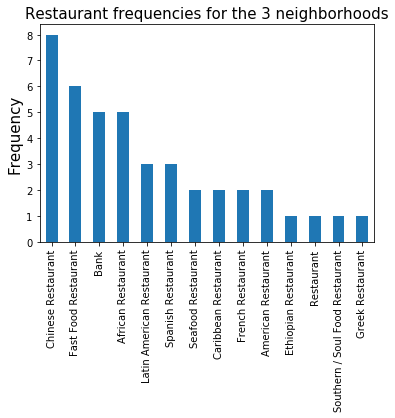

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
s = suitable_venue['Venue_Category'].value_counts()
plt.title('Restaurant frequencies for the 3 neighborhoods', fontsize=15)
plt.ylabel('Frequency', fontsize = 15) #for y label
#plt.xlabel('', fontsize = 15) #for x label
s.plot(kind='bar')
plt.savefig('Capstone11.png', bbox_inches="tight")

In [51]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



Let's use a WordCloud to quickly see the most common venue category across our venues

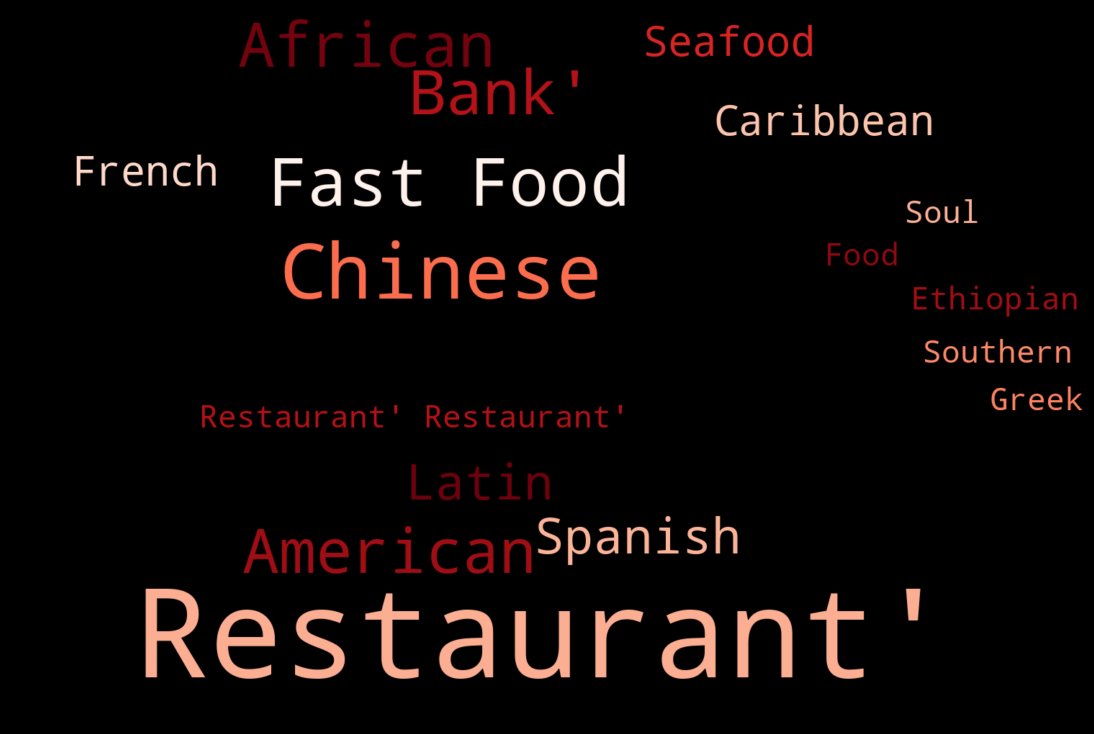

<Figure size 432x288 with 0 Axes>

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = suitable_venue.Venue_Category.values
wordcloud = WordCloud(
    width = 1600,
    height = 1000,
    colormap = 'Reds',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('Capstone12.png',bbox_inches='tight')

<h1 align=center> Analysis </h1>

 The results suggest that our client has three options with different conditions as follows:
1. Central Harlem is closest to the initial condition of locating near other African restaurants. There are 4 African restaurants in particular and therefore it seems the location is already popular with African expatriates or visitors. 
2. Fordham has a very strong financial surrounding with a lot of banks though not as many African restaurants. Establishing here means less competition and perhaps access to a working demographic.
3. University Heights has the least of venues perhaps due to it being a college environment. This may be the least suitable place to locate since already they are few such facilities. There could be a barrier of entry which we need to look closely at.